- Implementation of decision trees and randomforest classifier on diabetes, iris dataset (feature importance plot)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("Downloads/diabetes.csv", header='infer', names=col_names, skiprows=1)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = pima[feature_cols]
y = pima.label

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [15]:
clf = DecisionTreeClassifier()
#default gini ratio attribut with minimum gini index is picked
#use entropy for information gain

In [11]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8008658008658008


In [16]:
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [17]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6926406926406926


In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

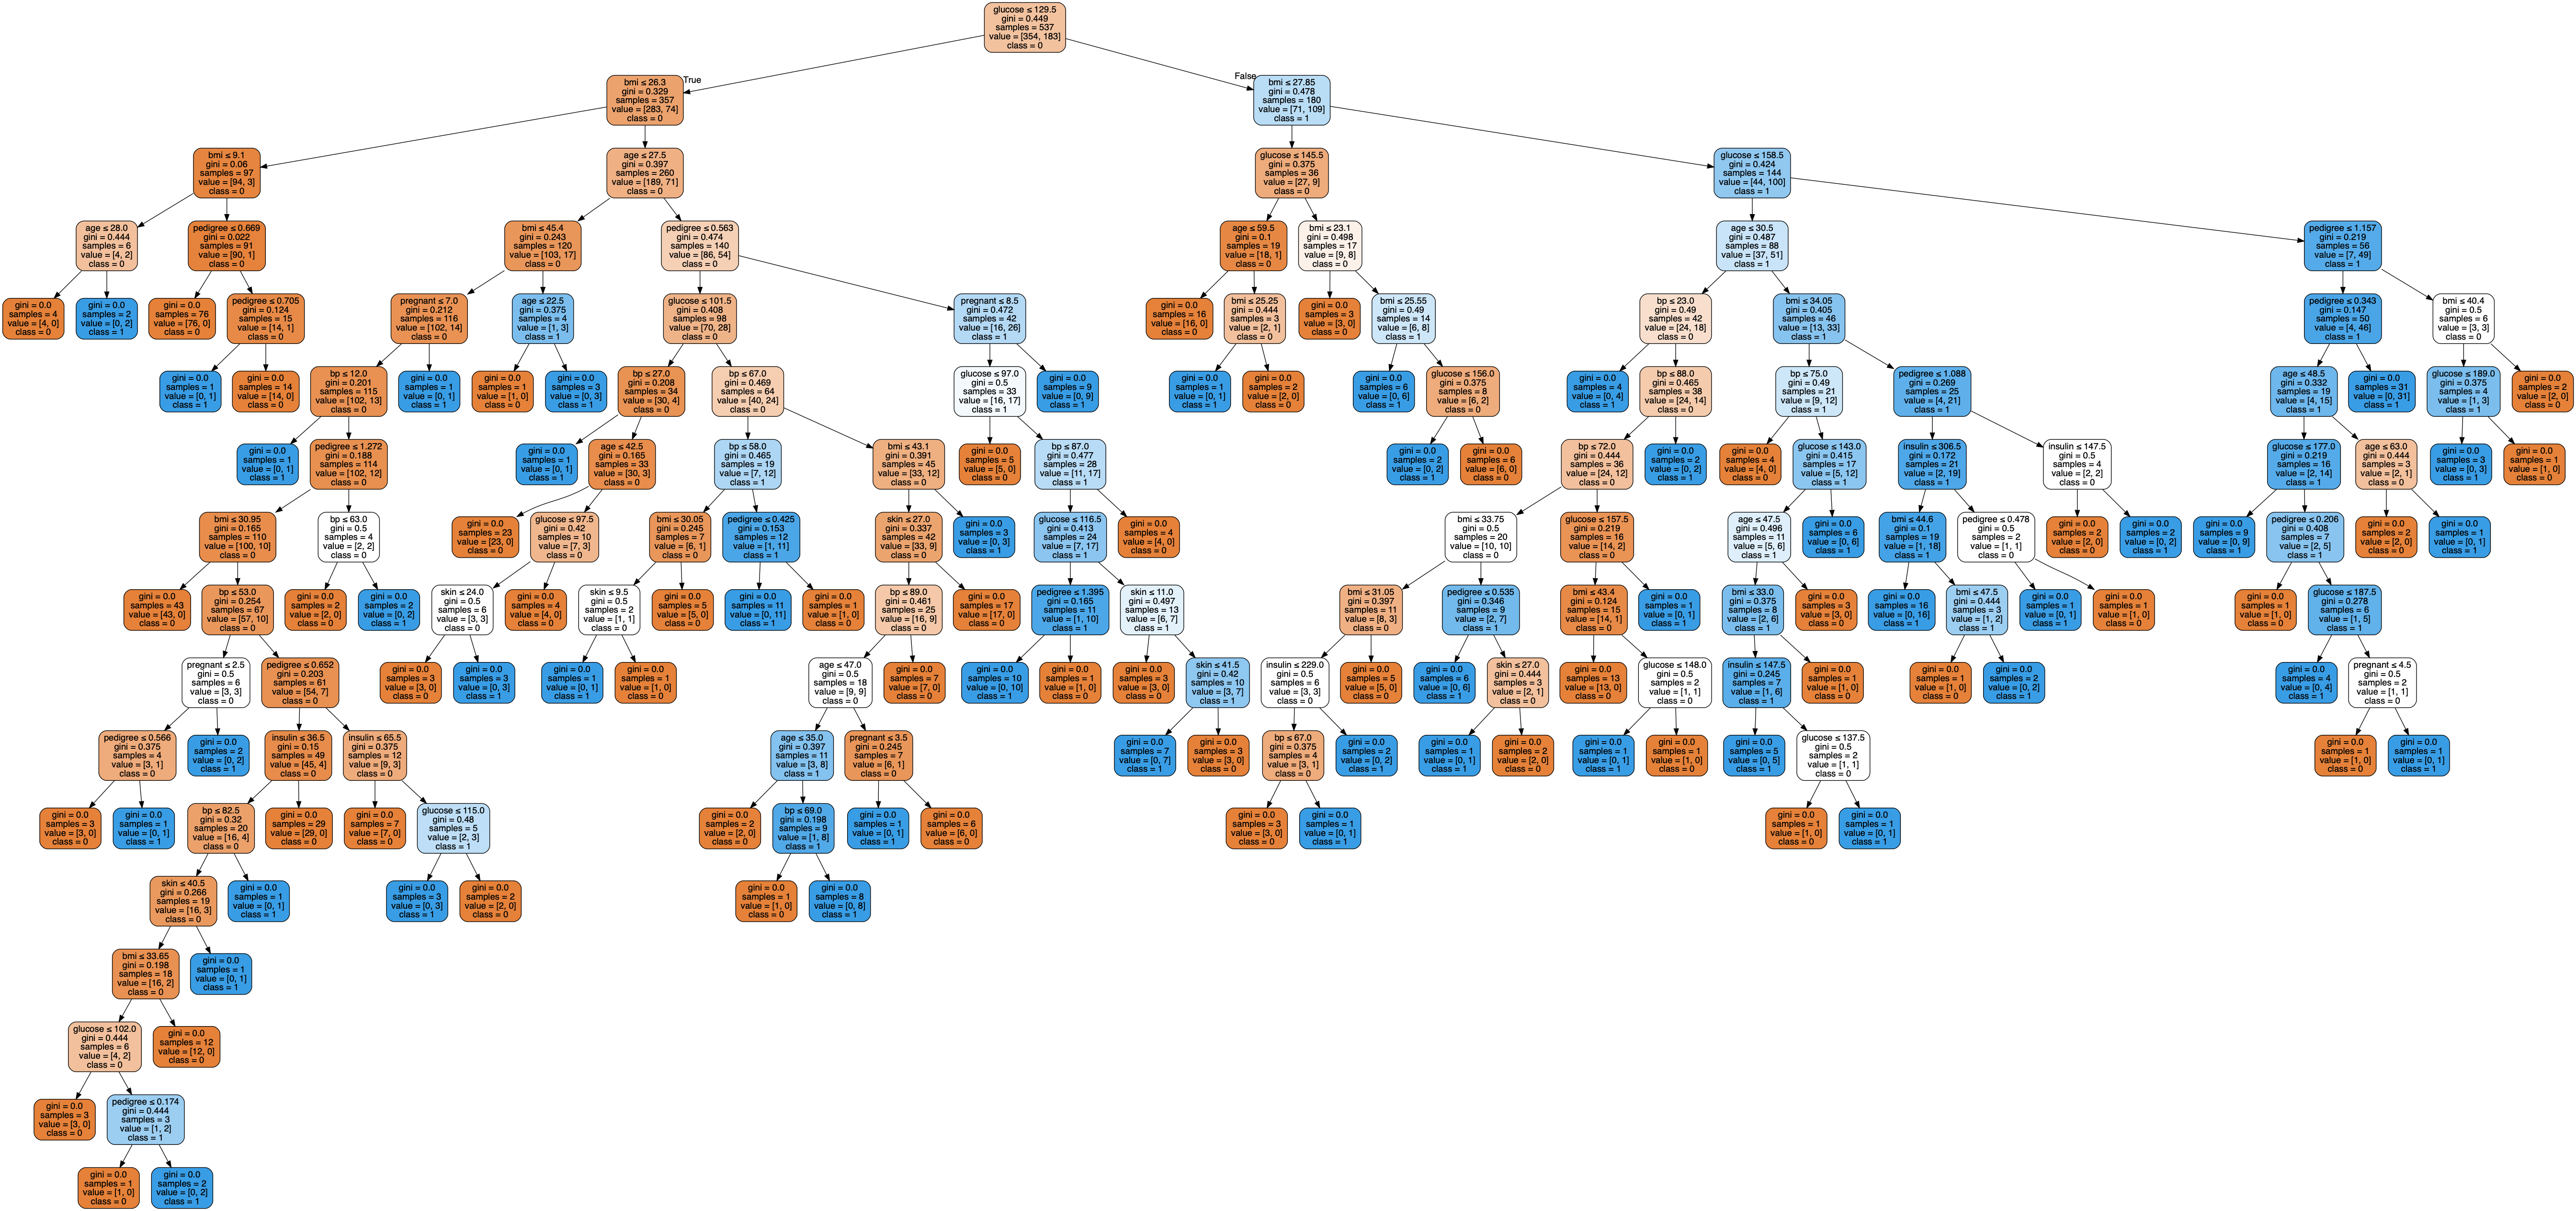

In [21]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [22]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [23]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7705627705627706


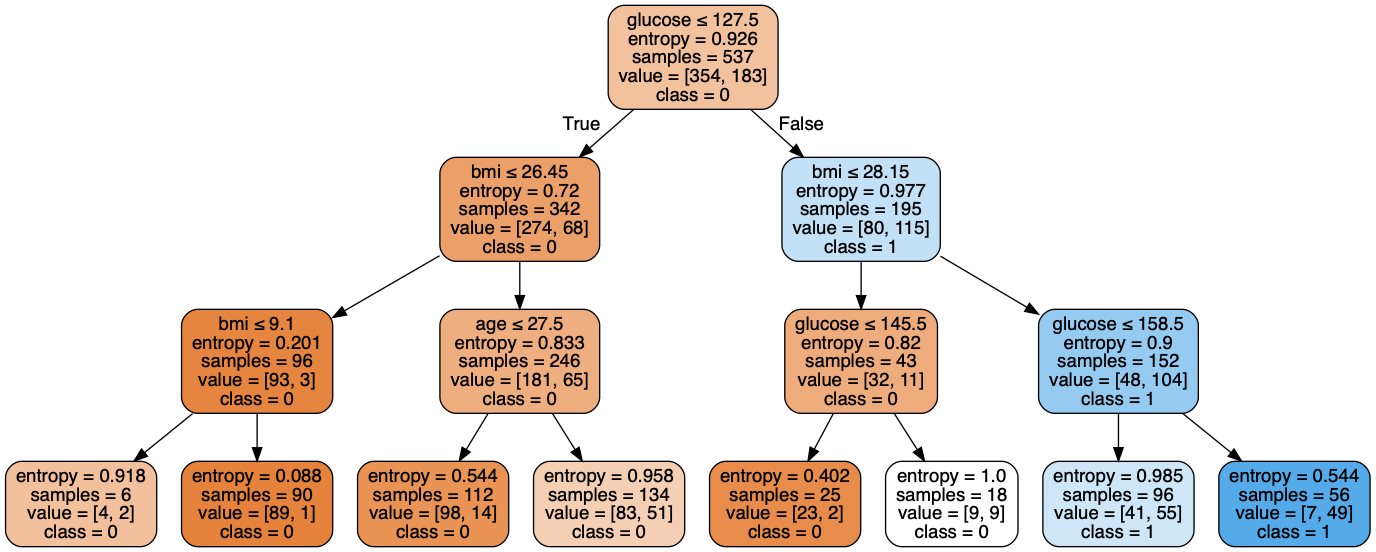

In [24]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_3.png')
Image(graph.create_png())

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data[0:5])
print(iris.target)
import pandas as pd
data = pd.DataFrame({
    'sepal length': iris.data[:,0],
    'sepal width': iris.data[:,1],
    'petal length': iris.data[:,2],
    'petal width': iris.data[:,3],
    'species': iris.target
})
print(data.head())

from sklearn.model_selection import train_test_split

X = data[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
   sepal length  sepal width  petal length  petal width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0
Accuracy:  0.9777777777777777


In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.483649
petal length (cm)    0.392029
sepal length (cm)    0.083071
sepal width (cm)     0.041251
dtype: float64

No handles with labels found to put in legend.


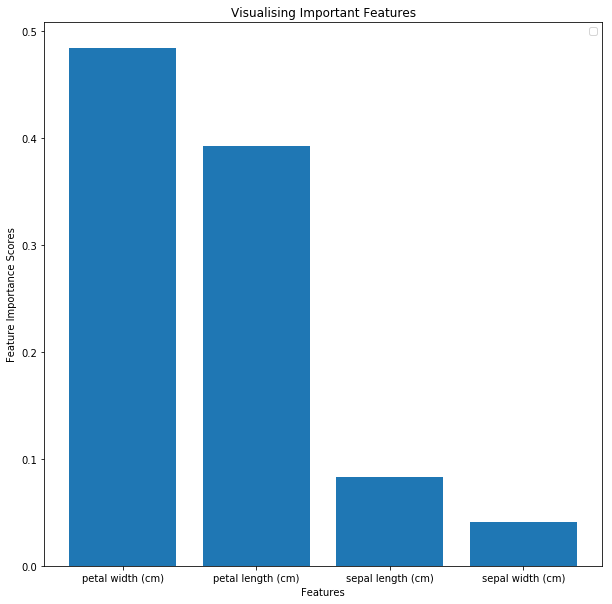

In [38]:
plt.figure(figsize=(10,10))
plt.bar(x=feature_imp.index,height=feature_imp)
plt.xlabel("Features")
plt.ylabel("Feature Importance Scores")
plt.title("Visualising Important Features")
plt.legend()
plt.show()

In [40]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  1.0


In [41]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.919767
petal length (cm)    0.051662
sepal width (cm)     0.014286
sepal length (cm)    0.014286
dtype: float64

No handles with labels found to put in legend.


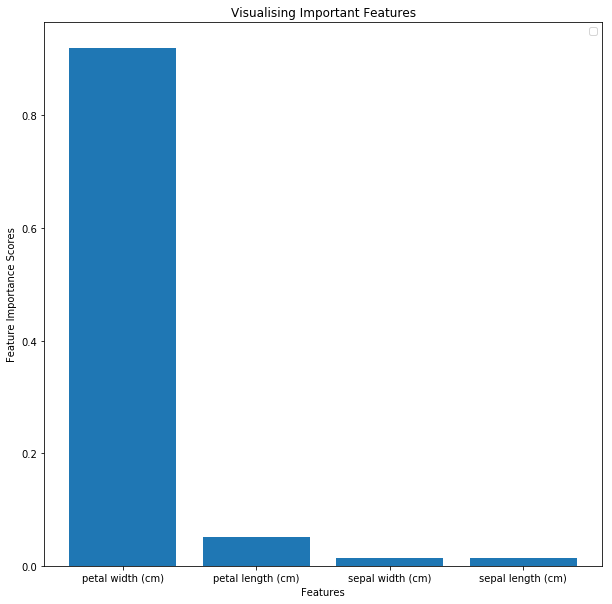

In [42]:
plt.figure(figsize=(10,10))
plt.bar(x=feature_imp.index,height=feature_imp)
plt.xlabel("Features")
plt.ylabel("Feature Importance Scores")
plt.title("Visualising Important Features")
plt.legend()
plt.show()

In [51]:
X = data[['petal width', 'petal length', 'sepal length']]
y = data['species']
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.3,random_state = 5)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(Y_test,y_pred))

Accuracy:  0.9777777777777777


In [14]:
RandomForestClassifier?